In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Decision_Tree.csv")

Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temp         14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [5]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
for i in df:
    print(i)

Outlook
Temp
Humidity
Wind
Play tennis


In [7]:
print(df)

     Outlook  Temp Humidity    Wind Play tennis
0      Sunny   Hot     High    Weak          No
1      Sunny   Hot     High  Strong          No
2   Overcast   Hot     High    Weak         Yes
3       Rain  Mild     High    Weak         Yes
4       Rain  Cool   Normal    Weak         Yes
5       Rain  Cool   Normal  Strong          No
6   Overcast  Cool   Normal  Strong         Yes
7      Sunny  Mild     High    Weak          No
8      Sunny  Cool   Normal    Weak         Yes
9       Rain  Mild   Normal    Weak         Yes
10     Sunny  Mild   Normal  Strong         Yes
11  Overcast  Mild     High  Strong         Yes
12  Overcast   Hot   Normal    Weak         Yes
13      Rain  Mild     High  Strong          No


In [8]:
df.isnull().sum()

Outlook        0
Temp           0
Humidity       0
Wind           0
Play tennis    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()

In [10]:
df['Outlook']=a.fit_transform(df['Outlook'])
df['Temp']=a.fit_transform(df['Temp'])
df['Humidity']=a.fit_transform(df['Humidity'])
df['Wind']=a.fit_transform(df['Wind'])
df['Play tennis']=a.fit_transform(df['Play tennis'])

In [11]:
df

,Outlook,Temp,Humidity,Wind,Play tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [12]:
df.describe()

,Outlook,Temp,Humidity,Wind,Play tennis
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.071429,1.142857,0.500000,0.571429,0.642857
std,0.828742,0.864438,0.518875,0.513553,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temp         14 non-null     int32
 2   Humidity     14 non-null     int32
 3   Wind         14 non-null     int32
 4   Play tennis  14 non-null     int32
dtypes: int32(5)
memory usage: 412.0 bytes


In [14]:
df.corr()

,Outlook,Temp,Humidity,Wind,Play tennis
Outlook,1.000000,0.092036,-8.944272e-02,7.745967e-02,-0.493333
Temp,0.092036,1.000000,-5.144958e-01,-2.475369e-02,-0.051131
Humidity,-0.089443,-0.514496,1.000000e+00,-6.409876e-17,0.447214
Wind,0.077460,-0.024754,-6.409876e-17,1.000000e+00,0.258199
Play tennis,-0.493333,-0.051131,4.472136e-01,2.581989e-01,1.000000


# Using decision tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [16]:

X=df.drop('Play tennis',axis=1,inplace=False)
y=df['Play tennis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



In [18]:
c=DecisionTreeClassifier()

In [19]:
c.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred=c.predict(X_test)

In [21]:
from sklearn.metrics import f1_score,accuracy_score

In [22]:
print(f1_score(y_test,y_pred))

0.6666666666666666


In [23]:
print(accuracy_score(y_test,y_pred))

0.6


In [24]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [1, 2]], dtype=int64)

<Axes: >

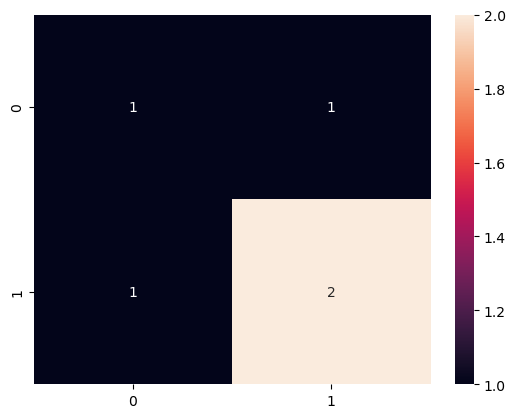

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
from sklearn import tree
with open("DT2.txt","w") as f:
    f=tree.export_graphviz(c,out_file=f)


In [28]:
y_p=c.predict_proba(X_test)[:,1]
y_p

array([1., 0., 0., 1., 1.])

Text(0.5, 1.0, 'ROC curve')

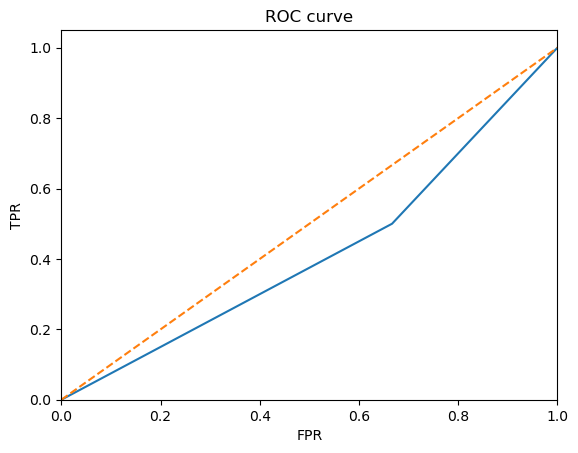

In [29]:
from sklearn.metrics import roc_curve,auc
tpr,fpr,_=roc_curve(y_test,y_p)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [30]:
a=auc(fpr,tpr)
print(a)

0.41666666666666663


# RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


In [32]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [1, 2]], dtype=int64)

<Axes: >

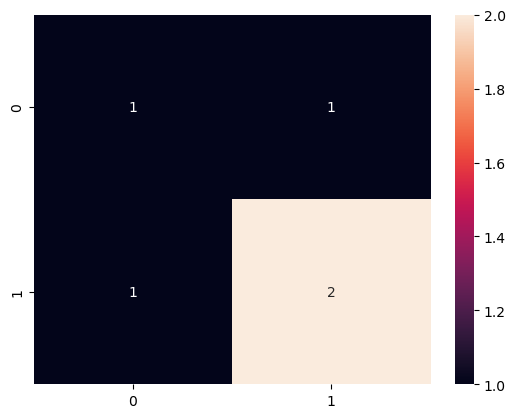

In [33]:
sns.heatmap(cm,annot=True)

In [34]:
y_p=rf_classifier.predict_proba(X_test)[:,1]
y_p

array([0.91, 0.47, 0.33, 0.94, 0.91])

Text(0.5, 1.0, 'ROC curve')

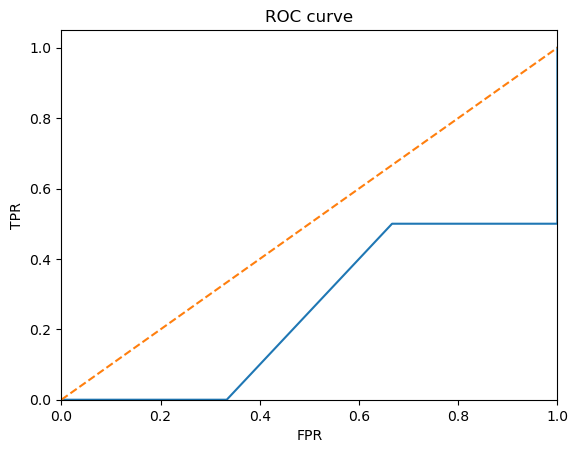

In [35]:
tpr,fpr,_=roc_curve(y_test,y_p)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [36]:
print(auc(fpr,tpr))

0.25
